# TASK 2 - IRIS FLOWER CLASSIFICATION

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load dataset

In [2]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
    
# Load the data
df = pd.read_csv('iris.data', names=columns)
df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.Class_labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class_labels, dtype: int64

In [4]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA 

# Relation between sepal length and class labels 

<AxesSubplot:xlabel='Class_labels', ylabel='Sepal length'>

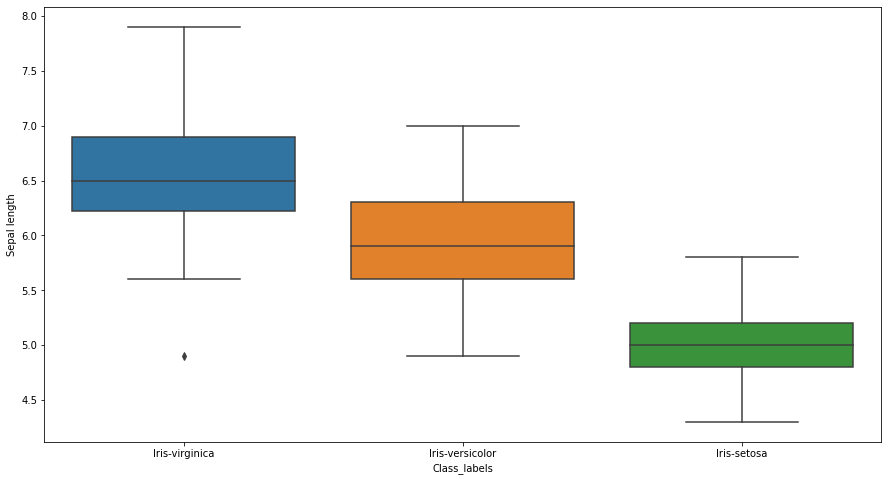

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Class_labels',y='Sepal length',data=df.sort_values('Sepal length',ascending=False))

# relation between sepal width

<AxesSubplot:xlabel='Sepal width', ylabel='Sepal length'>

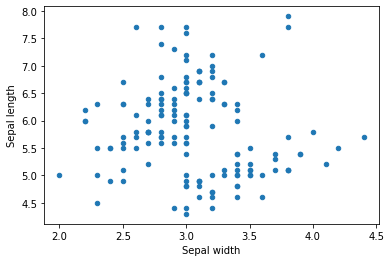

In [7]:
df.plot(kind='scatter',x='Sepal width',y='Sepal length')

# Relation between sepal width and sepal length

<AxesSubplot:xlabel='Sepal length', ylabel='Sepal width'>

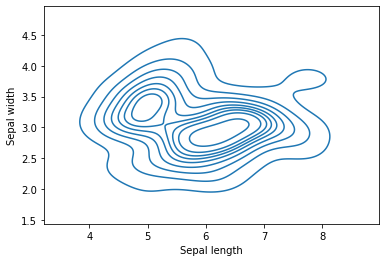

In [8]:
sns.kdeplot(x="Sepal length", y="Sepal width", data=df, multiple="stack")

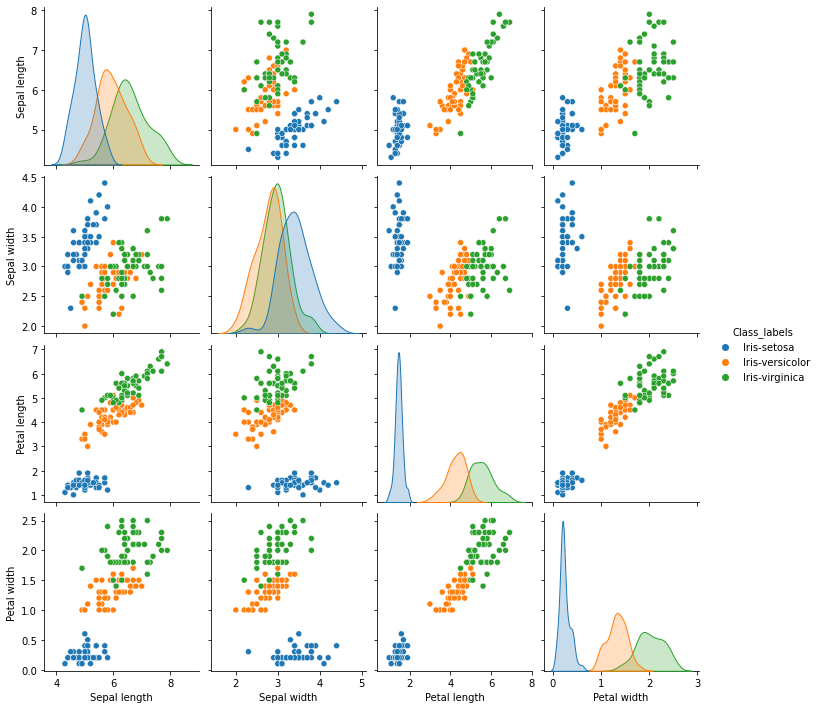

In [9]:
# let's us Visualize the whole dataset

sns.pairplot(df, hue='Class_labels')

<AxesSubplot:>

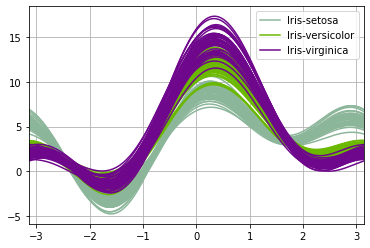

In [10]:
# Andrews curve
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Class_labels")

In [11]:
#average of each feature (seperate feature and target).
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [12]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

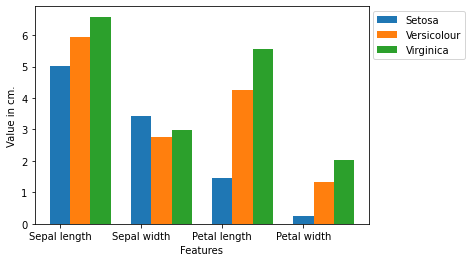

In [13]:
# lets Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [14]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Algorithms check point

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

In [16]:
#spot check algorithms
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [17]:
#evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

LR:0.950000(0.066667)
LDA:0.975000(0.053359)
KNN:0.958333(0.041667)
CART:0.950000(0.066667)
NB:0.958333(0.055902)
SVM:0.983333(0.033333)


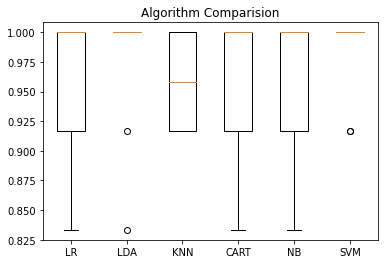

In [18]:
#compare algorithms
plt.boxplot(results,labels=names)
plt.title('Algorithm Comparision')
plt.show()

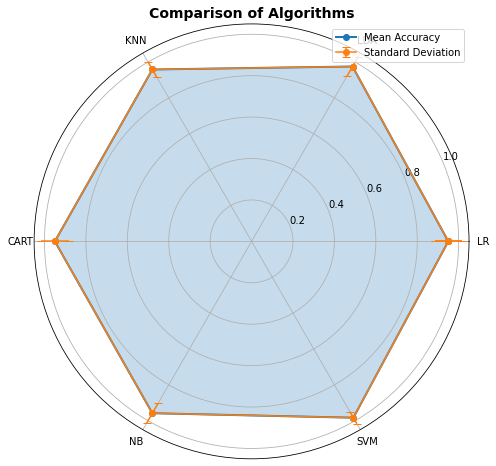

In [19]:
# Calculate the mean and standard deviation of the cross-validation results
means = [result.mean() for result in results]
stds = [result.std() for result in results]

num_algorithms = len(names)
angles = np.linspace(0, 2*np.pi, num_algorithms, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
ax.plot(angles, means + means[:1], 'o-', linewidth=2, label='Mean Accuracy')
ax.fill(angles, means + means[:1], alpha=0.25)
ax.errorbar(angles, means + means[:1], yerr=stds + stds[:1], fmt='o-', capsize=4, label='Standard Deviation')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(names)
ax.set_ylim(0, max(means) + max(stds))
ax.set_title('Comparison of Algorithms', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')

plt.show()


In [20]:
#make predicitions on test dataset
model=SVC(gamma='auto')
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [21]:
#Evaluate predictions
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0  7  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

